# Simple MCMC for Self-Avoiding Walk
## 1. Markov chains
Simply put, a *Markov chain* is a sequence $X_0, X_1, X_2, \ldots$ of random variables for which each element $X_n$ has distribution depending only on the preceding element $X_{n-1}$. More precisely, the distribution of $X_n$ conditional on the *past* $X_0, \ldots, X_{n-1}$ is the same as its distribution conditional only on the *immediate past* $X_{n-1}$. This *Markov property* can be written as the system of equations
$$P(X_n \mid X_0, \ldots, X_{n-1}) = P(X_n \mid X_{n-1})$$

## 1.1. Markov Chain Monte Carlo

Suppose we wish to sample from a probability distribution $\pi$ on a state space $\Omega$. For simplicity, let us assume that $\Omega$ is finite. A common approach to this problem is to use a *Markov Chain Monte Carlo (MCMC)* sampler: The idea is to construct an ergodic Markov chain $X = (X_n)_{n \ge 0}$ with stationary distribution $\pi$. Then by the ergodic theorem for Markov chains, as $n\to\infty$,
$$X_n \Rightarrow X,$$
where $X \sim \pi$. Thus, one can approximately sample from $\pi$ by sampling $X_n$ for large $n$.

### 1.2. The Metropolis-Hastings algorithm

The *Metropolis-Hastings algorithm* is a MCMC method for sampling from $\pi$ using only an unnormalized version $f$ of $\pi$. This is commonly needed, for example, when $\pi$ is a Gibbs-type distribution of the form
$$\pi(\omega) = \frac{1}{Z} \; f(\omega),$$
for which the *partition function*
$$Z = \sum_{\omega\in\Omega} f(\omega)$$
can be difficult to compute when $\Omega$ is large.

The algorithm presupposes a choice of irreducible Markov chain on $\Omega$ with transition matrix $P$. Given such a choice of $P$, we define an $\Omega \times \Omega$ matrix $Q$ via

$$
Q(\omega, \omega') =
\begin{cases}
P(\omega, \omega'), & \omega \ne \omega', r(\omega, \omega') \ge 1 \\
P(\omega, \omega') r(\omega, \omega'), & \omega \ne \omega', r(\omega, \omega') < 1 \\
P(\omega, \omega')
    + \sum_{\tilde\omega : r(\omega, \tilde\omega) < 1}
       P(\omega, \tilde\omega) (1 - r(\omega, \tilde\omega)), & \omega = \omega'
\end{cases},
$$
where the *acceptance ratio* $r(\omega, \omega')$ is given by
$$
r(\omega, \omega')
    = \frac{\pi(\omega') P(\omega', \omega)}{\pi(\omega) P(\omega, \omega')}
    = \frac{f(\omega') P(\omega', \omega)}{f(\omega) P(\omega, \omega')}.
$$

It is straightforward to verify that $Q$ defines an irreducible, reversible Markov chain $X = (X_n)_{n \ge 0}$ on $\Omega$ with stationary distribution $\pi$. Thus, one can approximately sample from $\pi$ by sampling $X_n$ for large $n$. Moreover, one can generate $X_{n+1}$ from $X_n$ by first sampling $\tilde X_{n+1}$ via $P$ and then either accepting the choice $X_{n+1} = \tilde X_{n+1}$ with probability given by $r$ (which can be computed solely in terms of $f$ and $P$), and otherwise setting $X_{n+1} = X_n$.

## 2. The self-avoiding walk

The *self-avoiding walk* is a model of a linear polymer in a good solution. The microcanonical ensemble on walks of fixed length $n$ is given by the uniform measure $\pi = \pi_n$ on the collection $\Omega = \Omega_n$ of nearest-neighbour paths on $\mathbb{Z}^d$ starting at $0.$ That is,
$$\pi(\omega) = \frac{1}{c_n},$$
where $c_n = |\Omega_n|$.

The self-avoiding walk has been implemented as a class `saw` in the module `saw`. Let's
create an instance `s` of this class with 20 steps:

In [1]:
import saw

In [2]:
s = saw.saw(20)

The class `saw.saw` is a subclass of `Subsequence`, so the walk `s` is indexable. For example, we can write:

In [3]:
s[10]

array([10,  0])

We can plot using `saw.plotwalk`. First, let's make sure we can view plots inline in this notebook:

In [4]:
%matplotlib inline

We'll run `saw.plotwalk` with the option `'-'` to hide the vertices (since the walk is somewhat long).

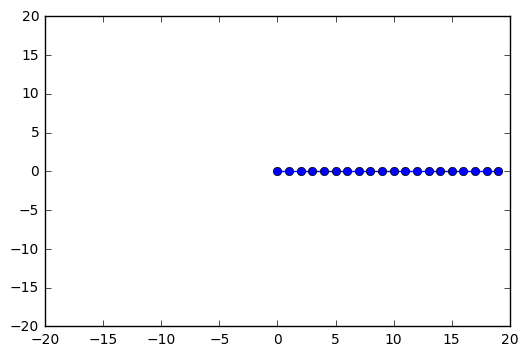

In [5]:
saw.plotwalk(s)

As can be seen above, the walk is initialized as a straight line.

### 2.1. The pivot algorithm

The pivot algorithm is a MCMC algorithm for sampling from $\pi$. The transition matrix is given by
$$P(\omega, T(\omega)) = \frac{1}{2dn},$$
for any *pivot transformation* $T = T_{i,r}$: that is, $T(\omega)$ is the walk obtained from $\omega$ by applying a lattice rotation $r$ to the segment of $\omega$ with steps from $i, \ldots, n$. If $\omega' \ne T(\omega)$ for all such $T$, then $P(\omega, \omega') = 0$.

It is straightforward to see that $P$ is an irreducible, reversible Markov chain with stationary distribution $\pi$.

We can pivot our walk `s` using the method `s.pivot`. First, we need a $2 \times 2$ rotation matrix. We can construct such a matrix `r` using numpy:

In [6]:
import numpy as np
r = np.array([[0, 1], [-1, 0]])

Then we can pivot the walk about step 10 with the method `s.pivot`:

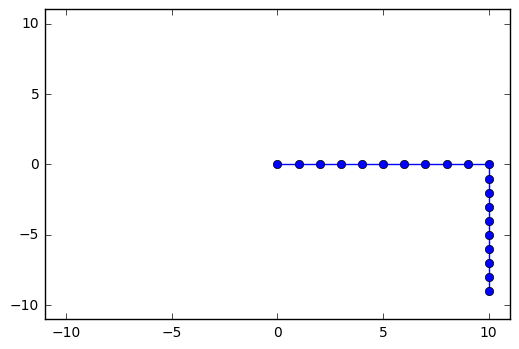

In [7]:
s.pivot(10, r);
saw.plotwalk(s)

We can run the pivot algorithm for 1000 iterations using `saw.saw.mix`. Let's do this using a new walk `t` with 100 steps:

In [8]:
t = saw.saw(100)
t.mix(1000)

Iteration 100

Iteration 200

Iteration 300

Iteration 400

Iteration 500

Iteration 600

Iteration 700

Iteration 800

Iteration 900



This time, let's plot the walk with the option `'-'` to hide the vertices:

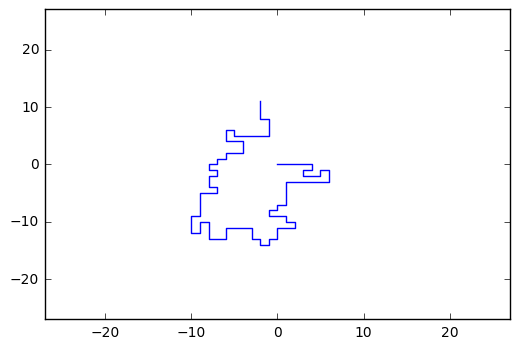

In [9]:
saw.plotwalk(t, '-')

## 3. The weakly self-avoiding walk

The Domb-Joyce model or discrete-time weakly self-avoiding walk is a variant of the self-avoiding walk. For walks of length $n$ and coupling strength $g$ (typically positive), the canonical distribution for the Domb-Joyce model is given by the measure $\pi = \pi_{g,n}$ on $\Omega = \Omega_n$ defined by
$$\pi(\omega) = \frac{1}{c_{g,n}} e^{-g I(\omega)},$$
where $I(\omega)$ is the number of intersections in $\omega$ and
$$c_{g,n} = \sum_{\omega\in\Omega_n} e^{-g I(\omega)}$$
is the canonical partition function.

### 3.2. Simulating the weakly self-avoiding walk

The Domb-Joyce model can be simulated using the Metropolis algorithm, where our choice of underlying Markov chain $P$ is given by the pivot algorithm.
Namely, we generate the Markov chain with transition matrix $Q$ given by
$$
Q(\omega, \omega') = \frac{1}{2dn}
\begin{cases}
1, & \omega \ne \omega', r(\omega, \omega') \ge 1 \\
r(\omega, \omega'), & \omega \ne \omega', r(\omega, \omega') < 1 \\
1 + \sum_{\tilde\omega : r(\omega, \tilde\omega) < 1} (1 - r(\omega, \tilde\omega)),
    & \omega = \omega'
\end{cases},
$$
where
$$r(\omega, \omega') = e^{-g (I(\omega') - I(\omega))}.$$
Note that
$$r(\omega, \omega') \ge 1 \Leftrightarrow I(\omega') \le I(\omega).$$

To construct a weak self-avoiding walk `w` with 100 steps and $g = 1$, run:

In [15]:
w = saw.saw(100, energy='weak', params=[1])

We can run the pivot algorithm as before:

In [16]:
w.mix(500)

Iteration 100

Iteration 200

Iteration 300

Iteration 400



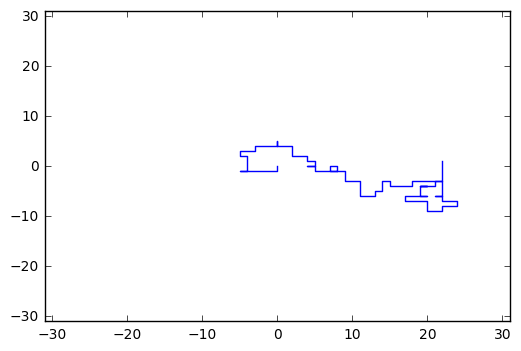

In [17]:
saw.plotwalk(w, '-')

Notice how the simulation above contains a few intersections, but is mostly intersection-free.

## 4. Other models

Given any energy function $H : \Omega_n \to \mathbb{R}$, we can define a model of walks by assigning probabilities to the $\omega\in\Omega_n$ proportional to $e^{-H(\omega)}$. For example, the module `saw` contains the energy function `saw.wsaw_sa` for a weakly self-avoiding walk with contact self-attraction. This function $H = H_{g,\gamma}$ depends on two parameters $g, \gamma$ and is defined by
$$H(\omega) = g I(\omega) - \gamma C(\omega),$$
where $C(\omega)$ is the number of self-contacts in $\omega$.

Suppose we have an energy function `energy` that takes certain parameters as arguments. That is, this function is of the form `energy(walk, p1, p2, ...)`. We can construct such a walk by passing the energy function and the parameters (as a list) when we initialize `saw.saw`. For instance, with the energy function `saw.wsaw_sa`, we have the following:

In [13]:
u = saw.saw(100, energy=saw.wsaw_sa, params=[3, 2])

## References

1. Diaconis, P.: The Markov Chain Monte Carlo Revolution. Bull. Amer. Math. Soc. (N.S.) **46**, 179-205 (2009)
2. Madras, N. and Slade, G.: The Self-Avoiding Walk, Birkhauser, Boston, (1993)